In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_curve, auc

In [95]:
file = "/Users/mohammed/code/cs430/project/diabetes_data.csv"

# Behavioral Risk Factor Surveillance System
### By the CENTERS FOR DISEASE CONTROL AND PREVENTION (CDC) from the USA
##### Public health surveys of 400k people from 2011-2015

The objective of the BRFSS is to collect uniform, state-specific data on preventive health practices and risk
behaviors that are linked to chronic diseases, injuries, and preventable infectious diseases in the adult population.
Factors assessed by the BRFSS include tobacco use, health care coverage, HIV/AIDS knowledge or prevention,
physical activity, and fruit and vegetable consumption. Data are collected from a random sample of adults (one per
household) through a telephone survey.

The Behavioral Risk Factor Surveillance System (BRFSS) is the nation's premier system of health-related telephone surveys that collect state data about U.S. residents regarding their health-related risk behaviors, chronic health conditions, and use of preventive services. Established in 1984 with 15 states, BRFSS now collects data in all 50 states as well as the District of Columbia and three U.S. territories. BRFSS completes more than 400,000 adult interviews each year, making it the largest continuously conducted health survey system in the world.

Here we focus on risk factors for diabetes.

In [96]:
df = pd.read_csv(file)

In [97]:
df.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


### This dataset.

The Behavioral Risk Factor Surveillance System (BRFSS) is a health-related telephone survey that is collected annually by the CDC. Each year, the survey collects responses from over 400,000 Americans on health-related risk behaviors, chronic health conditions, and the use of preventative services. It has been conducted every year since 1984. For this project, a csv of the dataset available on Kaggle for the year 2015 was used. This original dataset contains responses from 441,455 individuals and has 330 features. These features are either questions directly asked of participants, or calculated variables based on individual participant responses.

This is a clean dataset of 70,692 survey responses to the CDC's BRFSS2015. It has an equal 50-50 split of respondents with no diabetes and with either prediabetes or diabetes. The target variable Diabetes_binary has 2 classes. 0 is for no diabetes, and 1 is for prediabetes or diabetes. This dataset has 17 feature variables and one class and is balanced.

Some questions that may be asked:

1. Can survey questions from the BRFSS provide accurate predictions of whether an individual has diabetes?
2. What risk factors are most predictive of diabetes risk?
3. Can we use a subset of the risk factors to accurately predict whether an individual has diabetes?
4. Can we create a short form of questions from the BRFSS using feature selection to accurately predict if someone might have diabetes or is at high risk of diabetes?


Original dataset: https://www.kaggle.com/datasets/cdc/behavioral-risk-factor-surveillance-system

Cleaned dataset: https://www.kaggle.com/datasets/alexteboul/diabetes-health-indicators-dataset

In [98]:
df.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.062171,0.563458,0.500000
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.241468,0.495960,0.500004
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,0.000000,1.000000,1.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


In [99]:
df.dtypes

Age                     float64
Sex                     float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Stroke                  float64
HighBP                  float64
Diabetes                float64
dtype: object

# On Diabetes


Diabetes is among the most prevalent chronic diseases in the United States, impacting millions of Americans each year and exerting a significant financial burden on the economy. Diabetes is a serious chronic disease in which individuals lose the ability to effectively regulate levels of glucose in the blood, and can lead to reduced quality of life and life expectancy. After different foods are broken down into sugars during digestion, the sugars are then released into the bloodstream. This signals the pancreas to release insulin. Insulin helps enable cells within the body to use those sugars in the bloodstream for energy. Diabetes is generally characterized by either the body not making enough insulin or being unable to use the insulin that is made as effectively as needed.

Complications like heart disease, vision loss, lower-limb amputation, and kidney disease are associated with chronically high levels of sugar remaining in the bloodstream for those with diabetes. While there is no cure for diabetes, strategies like losing weight, eating healthily, being active, and receiving medical treatments can mitigate the harms of this disease in many patients. Early diagnosis can lead to lifestyle changes and more effective treatment, making predictive models for diabetes risk important tools for public and public health officials.

The scale of this problem is also important to recognize. The Centers for Disease Control and Prevention has indicated that as of 2018, 34.2 million Americans have diabetes and 88 million have prediabetes. Furthermore, the CDC estimates that 1 in 5 diabetics, and roughly 8 in 10 prediabetics are unaware of their risk. While there are different types of diabetes, type II diabetes is the most common form and its prevalence varies by age, education, income, location, race, and other social determinants of health. Much of the burden of the disease falls on those of lower socioeconomic status as well. Diabetes also places a massive burden on the economy, with diagnosed diabetes costs of roughly 327 billion dollars and total costs with undiagnosed diabetes and prediabetes approaching 400 billion dollars annually.

# The features.

Age: 13-level age category (AGEG5YR see codebook) 1 = 18-24 9 = 60-64 13 = 80 or older

Sex: patient's gender (1: male; 0: female).

HighChol: 0 = no high cholesterol 1 = high cholesterol

CholCheck: 0 = no cholesterol check in 5 years 1 = yes cholesterol check in 5 years

BMI: Body Mass Index

Smoker: Have you smoked at least 100 cigarettes in your entire life? (Note: 5 packs = 100 cigarettes) 0 = no 1 = yes

HeartDiseaseorAttack: coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes

PhysActivity: physical activity in past 30 days - not including job 0 = no 1 = yes

Fruits: Consume Fruit 1 or more times per day 0 = no 1 = yes

Veggies: Consume Vegetables 1 or more times per day 0 = no 1 = yes

HvyAlcoholConsump: (adult men >=14 drinks per week and adult women>=7 drinks per week) 0 = no 1 = yes

GenHlth: Would you say that in general your health is: scale 1-5 1 = excellent 2 = very good 3 = good 4 = fair 5 = poor

MentHlth: days of poor mental health scale 1-30 days

PhysHlth: physical illness or injury days in past 30 days scale 1-30

DiffWalk: Do you have serious difficulty walking or climbing stairs? 0 = no 1 = yes

Stroke: you ever had a stroke. 0 = no, 1 = yes

HighBP: 0 = no high, BP 1 = high BP

Diabetes: 0 = no diabetes, 1 = prediabebtes or diabetes

In [100]:
# df.rename(columns={'HeartDiseaseorAttack': 'Heart'}, inplace=True)
correlationMatrix = df.drop(['HvyAlcoholConsump', 'CholCheck'], axis=1).corr()

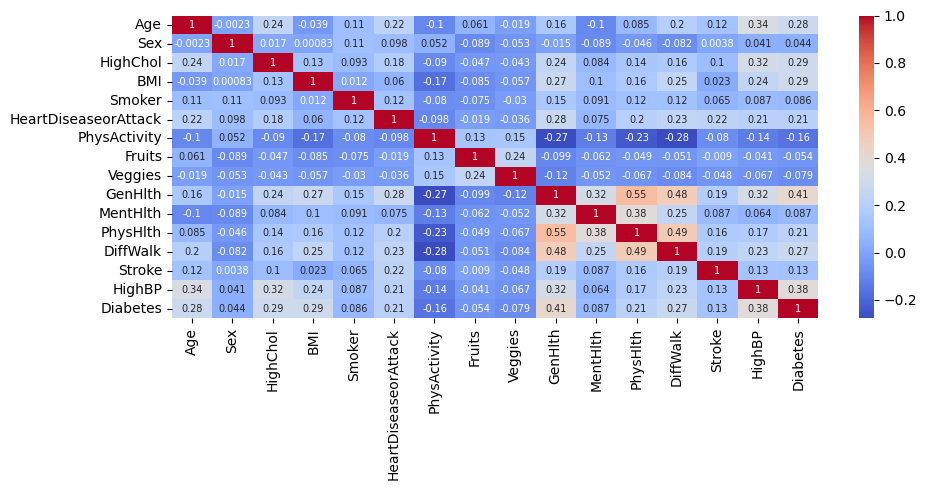

In [101]:
%matplotlib inline
# mask=np.triu(df.corr())
plt.figure(figsize=(10, 5))
sns.heatmap(correlationMatrix, annot=True, cmap='coolwarm', annot_kws={"size": 7})

# plt.title('Correlation Matrix for Diabetes Prediction')
plt.tight_layout()
plt.savefig('correlationMatrix.png', dpi=500)
plt.show()

None of the features are strongly correlated, highest correlation seen between expected variabels such as general health, mental health, physical health and difficulty walking. In fact, all these variables are trying to probe and quantify the similar things: a person's well-being.

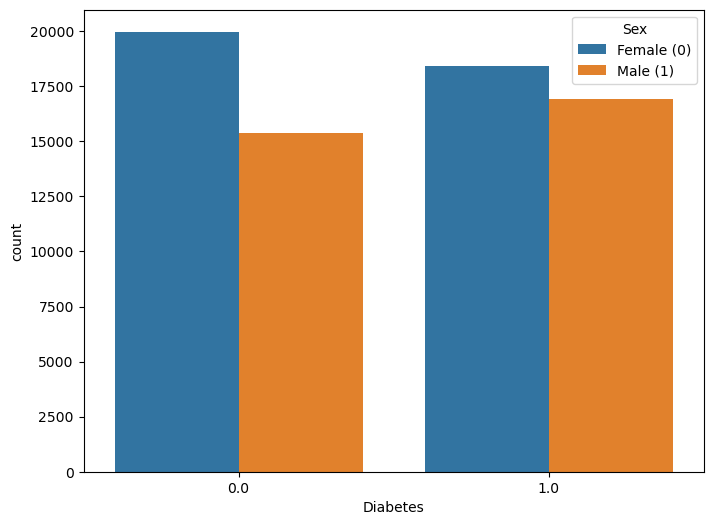

In [102]:
plt.figure(figsize=(8,6))
sns.countplot(x='Diabetes', data=df, hue='Sex')
plt.legend(title='Sex', labels=['Female (0)', 'Male (1)'])

([<matplotlib.axis.XTick at 0x287a99910>,
 [Text(0, 0, 'Female (0)'), Text(1, 0, 'Male (1)')])

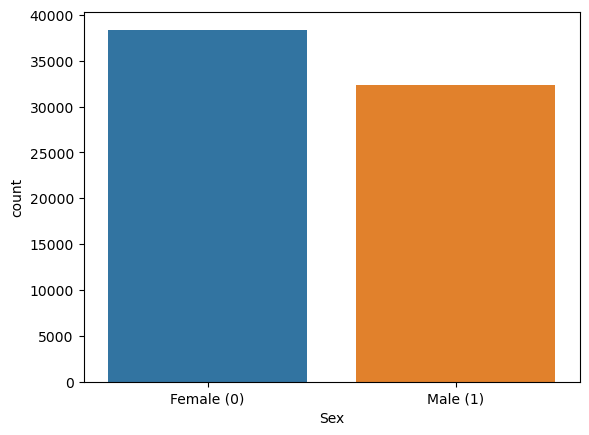

In [103]:
sns.countplot(x='Sex', data=df)
plt.xticks([0, 1], ['Female (0)', 'Male (1)'])

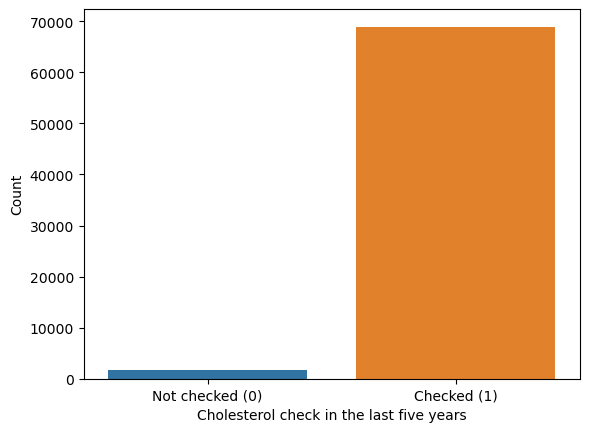

In [104]:
sns.countplot(x='CholCheck', data=df)
plt.ylabel('Count')
plt.xlabel('Cholesterol check in the last five years')
plt.xticks([0, 1], ['Not checked (0)', 'Checked (1)'])
plt.savefig('Cholesterol.png', dpi=500)

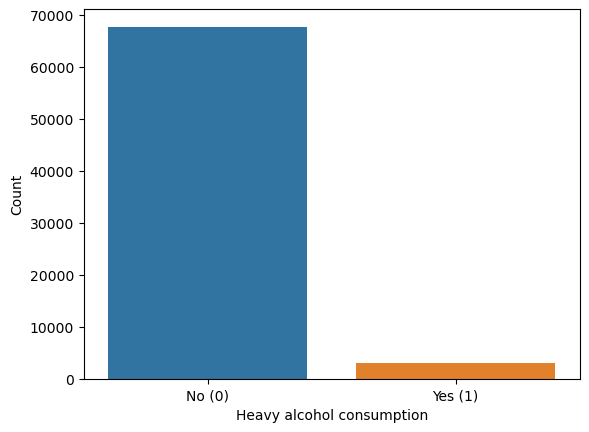

In [105]:
sns.countplot(x='HvyAlcoholConsump', data=df)
plt.ylabel('Count')
plt.xlabel('Heavy alcohol consumption')
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.savefig('Alcohol.png', dpi=500)

<Axes: xlabel='HighBP', ylabel='count'>

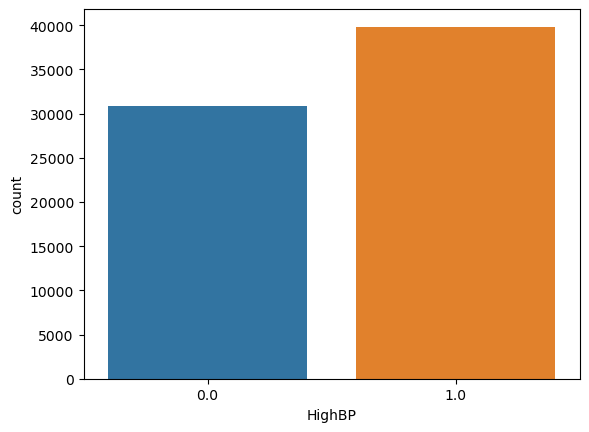

In [106]:
sns.countplot(x='HighBP', data=df)

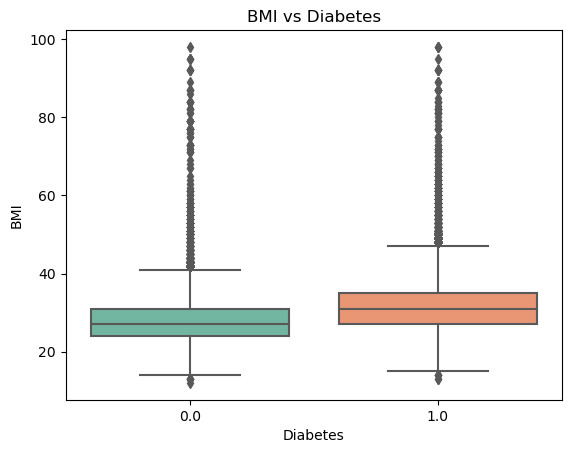

In [107]:
sns.boxplot(x='Diabetes', y='BMI', data=df, palette='Set2')
plt.title('BMI vs Diabetes')
plt.show()

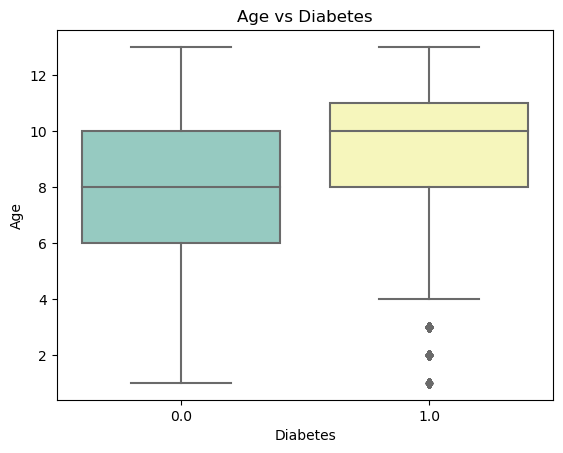

In [108]:
sns.boxplot(x='Diabetes', y='Age', data=df, palette='Set3')
plt.title('Age vs Diabetes')
plt.show()

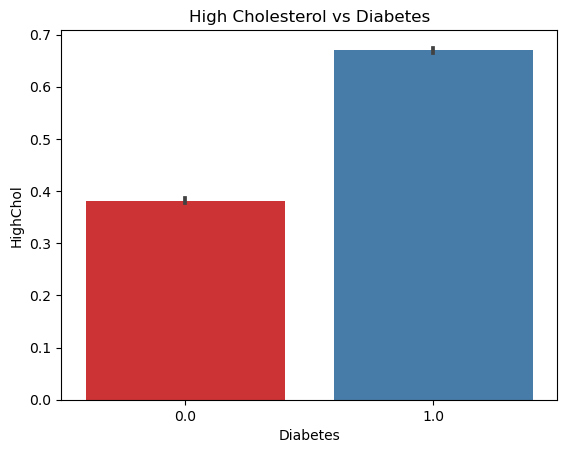

In [109]:
sns.barplot(x='Diabetes', y='HighChol', data=df, palette='Set1')
plt.title('High Cholesterol vs Diabetes')
plt.show()

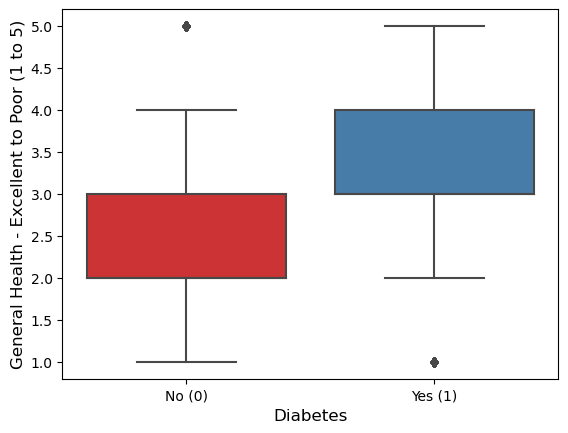

In [110]:
sns.boxplot(x='Diabetes', y='GenHlth', data=df, palette='Set1')
# plt.title('General Health vs Diabetes')
plt.ylabel('General Health - Excellent to Poor (1 to 5)', fontsize=12)
plt.xlabel('Diabetes', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.savefig('GeneralHealth.png', dpi=500)
plt.show()

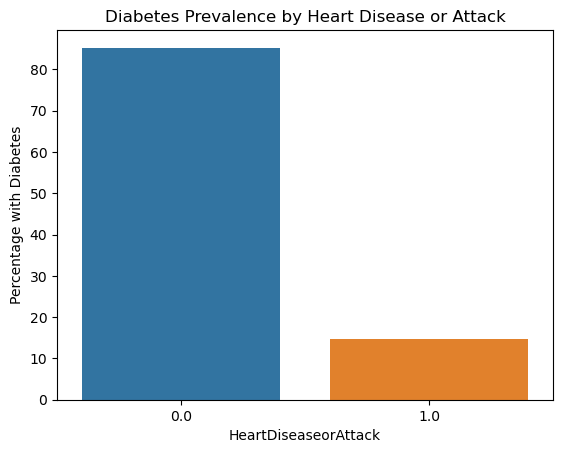

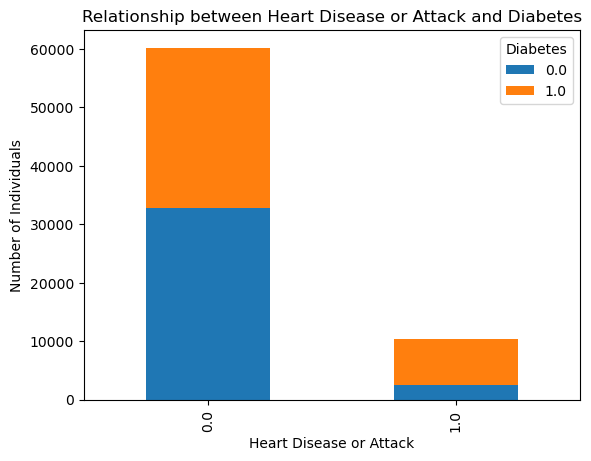

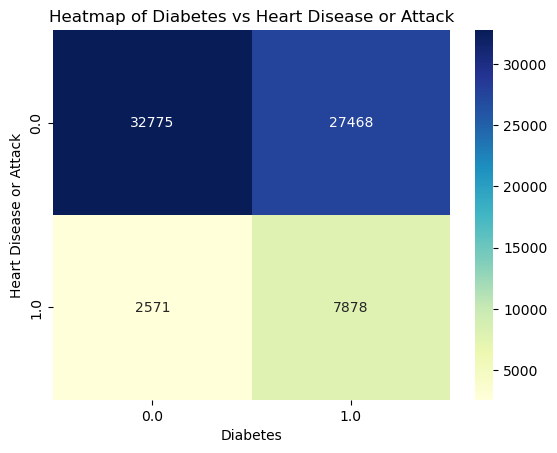

In [111]:
sns.barplot(x='HeartDiseaseorAttack', y='Diabetes', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Percentage with Diabetes')
plt.title('Diabetes Prevalence by Heart Disease or Attack')
plt.show()

# Data preparation for stacked bar plot
grouped_data = df.groupby(['HeartDiseaseorAttack', 'Diabetes']).size().unstack()

# Creating a stacked bar plot
grouped_data.plot(kind='bar', stacked=True)
plt.title('Relationship between Heart Disease or Attack and Diabetes')
plt.xlabel('Heart Disease or Attack')
plt.ylabel('Number of Individuals')
plt.show()

# Creating a contingency table
contingency_table = pd.crosstab(df['HeartDiseaseorAttack'], df['Diabetes'])

# Plotting the heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Diabetes vs Heart Disease or Attack')
plt.ylabel('Heart Disease or Attack')
plt.xlabel('Diabetes')
plt.show()

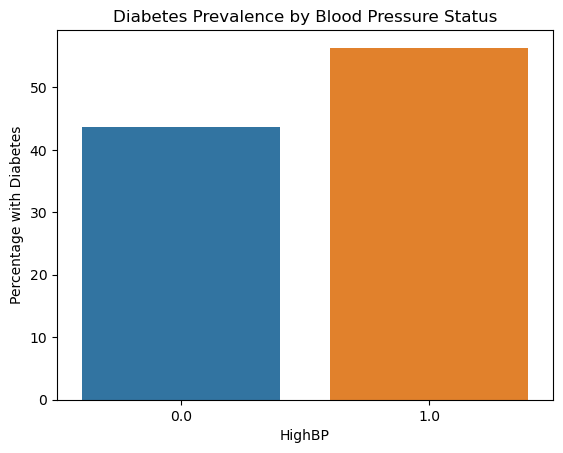

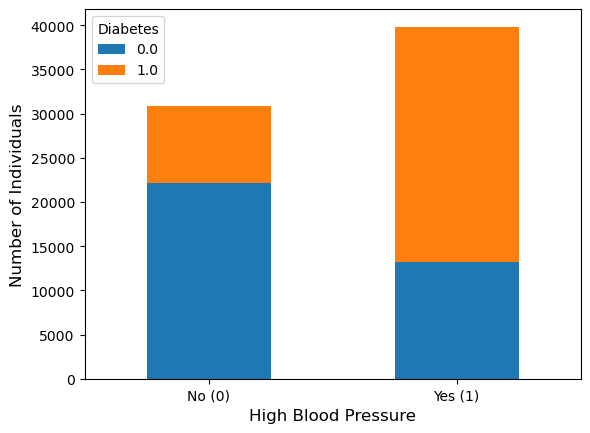

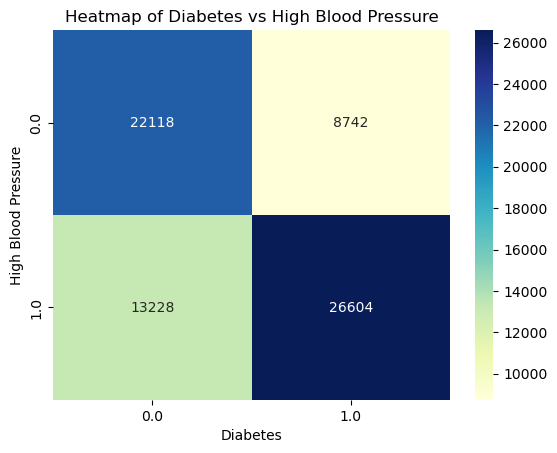

In [112]:
sns.barplot(x='HighBP', y='Diabetes', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Percentage with Diabetes')
plt.title('Diabetes Prevalence by Blood Pressure Status')
plt.show()

# Data preparation for stacked bar plot
grouped_data = df.groupby(['HighBP', 'Diabetes']).size().unstack()

# Creating a stacked bar plot
grouped_data.plot(kind='bar', stacked=True)
# plt.title('Relationship between High Blood Pressure and Diabetes')

plt.xlabel('High Blood Pressure', fontsize=12)
plt.ylabel('Number of Individuals', fontsize=12)
plt.xticks([0, 1], ['No (0)', 'Yes (1)'])
plt.xticks(rotation=360)
plt.savefig('HighBP.png', dpi=500)
plt.show()

# Creating a contingency table
contingency_table = pd.crosstab(df['HighBP'], df['Diabetes'])

# Plotting the heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Diabetes vs High Blood Pressure')
plt.ylabel('High Blood Pressure')
plt.xlabel('Diabetes')
plt.show()

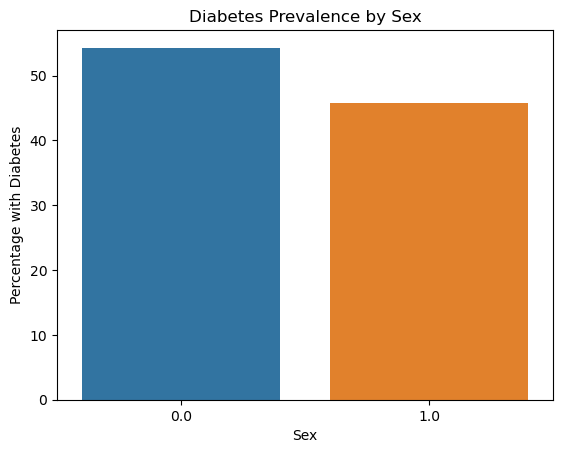

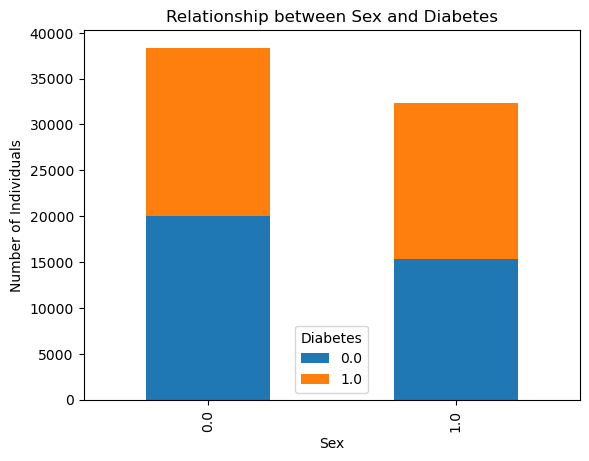

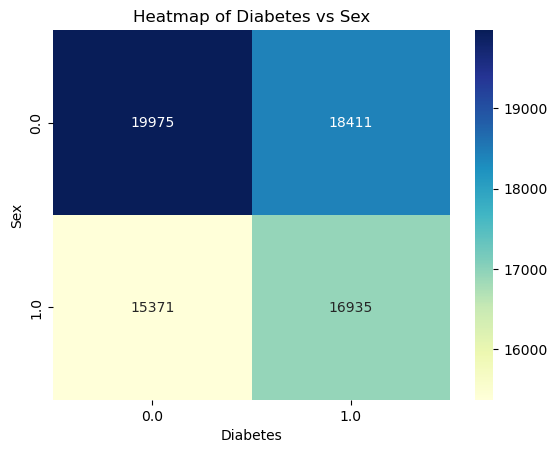

In [113]:
sns.barplot(x='Sex', y='Diabetes', data=df, estimator=lambda x: len(x) / len(df) * 100)
plt.ylabel('Percentage with Diabetes')
plt.title('Diabetes Prevalence by Sex')
plt.show()

# Data preparation for stacked bar plot
grouped_data = df.groupby(['Sex', 'Diabetes']).size().unstack()

# Creating a stacked bar plot
grouped_data.plot(kind='bar', stacked=True)
plt.title('Relationship between Sex and Diabetes')
plt.xlabel('Sex')
plt.ylabel('Number of Individuals')
plt.show()

# Creating a contingency table
contingency_table = pd.crosstab(df['Sex'], df['Diabetes'])

# Plotting the heatmap
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title('Heatmap of Diabetes vs Sex')
plt.ylabel('Sex')
plt.xlabel('Diabetes')
plt.show()

In [114]:
from scipy import stats

diabetic_group = df[df['Diabetes'] == 1]['BMI']
non_diabetic_group = df[df['Diabetes'] == 0]['BMI']

t_stat, p_value = stats.ttest_ind(diabetic_group, non_diabetic_group)
print("T-Statistic:", t_stat)
print("P-Value:", p_value)

T-Statistic: 81.59089746755323
P-Value: 0.0


# Outliers

In [115]:
from scipy import stats

In [116]:
z = np.abs(stats.zscore(df['BMI']))
threshold = 3
outliers = np.where(z > threshold)
len(outliers[0])

801

In [117]:
outlier_data = df.iloc[outliers]
outlier_data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
13,10.0,1.0,0.0,1.0,58.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0
192,6.0,1.0,0.0,1.0,52.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
199,8.0,0.0,0.0,1.0,69.0,0.0,0.0,0.0,0.0,1.0,0.0,5.0,10.0,30.0,1.0,0.0,0.0,0.0
284,9.0,0.0,0.0,0.0,56.0,0.0,0.0,1.0,1.0,1.0,0.0,4.0,0.0,3.0,1.0,0.0,1.0,0.0
446,4.0,0.0,0.0,1.0,52.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69328,4.0,0.0,1.0,1.0,54.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,30.0,30.0,0.0,0.0,1.0,1.0
69332,9.0,0.0,0.0,1.0,59.0,0.0,1.0,0.0,0.0,1.0,0.0,5.0,10.0,30.0,1.0,0.0,0.0,1.0
69439,10.0,0.0,1.0,1.0,54.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,0.0,7.0,0.0,0.0,0.0,1.0
70450,7.0,0.0,0.0,1.0,61.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,0.0,8.0,1.0,0.0,1.0,1.0


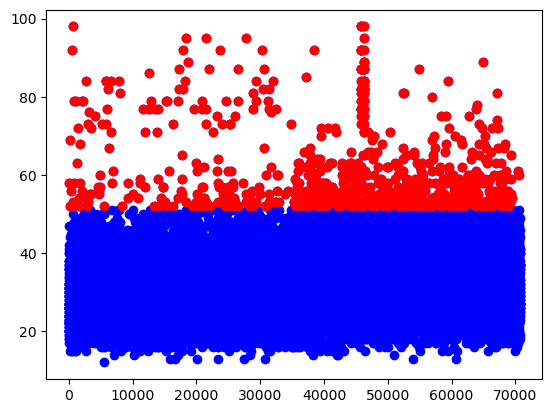

In [118]:
plt.scatter(df.index, df['BMI'], color='blue')
plt.scatter(outliers, df.iloc[outliers]['BMI'], color='red')
plt.show()

In [119]:
max(df['BMI'])

98.0

In [120]:
outlier_counts = {}

for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Checking if the column is numeric
        z = np.abs(stats.zscore(df[column]))
        threshold = 3
        outliers = np.where(z > threshold)
        outlier_counts[column] = len(outliers[0])

outlier_counts

{'Age': 0,
 'Sex': 0,
 'HighChol': 0,
 'CholCheck': 1749,
 'BMI': 801,
 'Smoker': 0,
 'HeartDiseaseorAttack': 0,
 'PhysActivity': 0,
 'Fruits': 0,
 'Veggies': 0,
 'HvyAlcoholConsump': 3020,
 'GenHlth': 0,
 'MentHlth': 4373,
 'PhysHlth': 0,
 'DiffWalk': 0,
 'Stroke': 4395,
 'HighBP': 0,
 'Diabetes': 0}

In [121]:
z = np.abs(stats.zscore(df['MentHlth']))
threshold = 3
outliers = np.where(z > threshold)
len(outliers[0])

4373

In [122]:
outlier_data = df.iloc[outliers]
outlier_data

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
30,4.0,0.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,30.0,14.0,1.0,0.0,1.0,0.0
65,7.0,0.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,1.0,0.0,0.0
72,9.0,1.0,1.0,1.0,21.0,1.0,0.0,0.0,0.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,1.0,0.0
103,8.0,0.0,1.0,1.0,28.0,1.0,1.0,0.0,0.0,1.0,0.0,3.0,30.0,30.0,1.0,0.0,1.0,0.0
121,1.0,1.0,0.0,0.0,36.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,30.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70653,12.0,0.0,0.0,1.0,23.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,30.0,30.0,1.0,0.0,0.0,1.0
70660,10.0,0.0,1.0,1.0,41.0,0.0,1.0,0.0,1.0,1.0,0.0,5.0,30.0,30.0,1.0,1.0,1.0,1.0
70670,7.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,30.0,0.0,1.0,0.0,1.0,1.0
70673,9.0,0.0,0.0,1.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,30.0,30.0,1.0,0.0,1.0,1.0


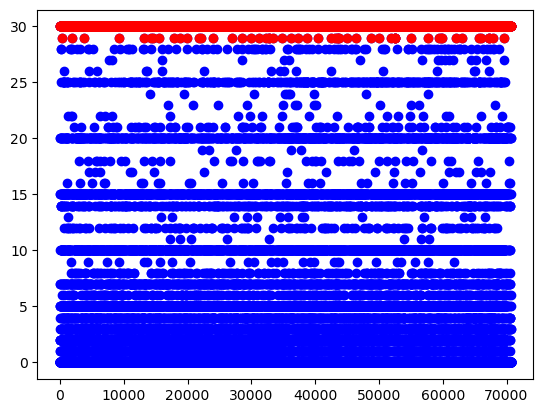

In [123]:
plt.scatter(df.index, df['MentHlth'], color='blue')
plt.scatter(outliers, df.iloc[outliers]['MentHlth'], color='red')
plt.show()

In [124]:
min(outlier_data['MentHlth'])

29.0

In [125]:
Q1 = df['BMI'].quantile(0.25)
Q3 = df['BMI'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['BMI'] < (Q1 - 1.5 * IQR)) | (df['BMI'] > (Q3 + 1.5 * IQR))]
outliers

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
13,10.0,1.0,0.0,1.0,58.0,0.0,0.0,0.0,1.0,1.0,0.0,3.0,3.0,3.0,0.0,0.0,1.0,0.0
42,3.0,1.0,1.0,1.0,47.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
99,5.0,0.0,0.0,1.0,47.0,0.0,0.0,1.0,0.0,1.0,1.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0
177,8.0,0.0,0.0,1.0,47.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,1.0,0.0,1.0,0.0
192,6.0,1.0,0.0,1.0,52.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70606,8.0,0.0,1.0,1.0,48.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,1.0
70620,10.0,0.0,1.0,1.0,46.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,14.0,21.0,1.0,0.0,1.0,1.0
70637,6.0,1.0,1.0,1.0,60.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,1.0,0.0,1.0,1.0
70645,6.0,0.0,0.0,1.0,46.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,1.0,1.0


In [126]:
min(outliers['MentHlth'])

0.0

In [127]:
Q1 = df['MentHlth'].quantile(0.25)
Q3 = df['MentHlth'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['MentHlth'] < (Q1 - 1.5 * IQR)) | (df['MentHlth'] > (Q3 + 1.5 * IQR))]
outliers

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
30,4.0,0.0,1.0,1.0,24.0,1.0,0.0,1.0,1.0,1.0,0.0,4.0,30.0,14.0,1.0,0.0,1.0,0.0
35,9.0,0.0,1.0,1.0,24.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,20.0,0.0,0.0,0.0,0.0,0.0
45,3.0,0.0,0.0,1.0,20.0,1.0,0.0,0.0,1.0,1.0,0.0,5.0,7.0,7.0,0.0,0.0,0.0,0.0
51,8.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,1.0,0.0,0.0,5.0,15.0,25.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70673,9.0,0.0,0.0,1.0,40.0,0.0,1.0,0.0,0.0,0.0,0.0,4.0,30.0,30.0,1.0,0.0,1.0,1.0
70675,6.0,0.0,1.0,1.0,28.0,0.0,1.0,1.0,0.0,1.0,0.0,5.0,20.0,29.0,1.0,1.0,1.0,1.0
70680,11.0,0.0,1.0,1.0,30.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,6.0,30.0,1.0,0.0,1.0,1.0
70684,9.0,1.0,1.0,1.0,27.0,0.0,1.0,1.0,0.0,1.0,0.0,4.0,30.0,5.0,0.0,0.0,1.0,1.0


In [128]:
min(outliers['MentHlth'])

6.0

# Logistic Regression

In [129]:
X = df.drop('Diabetes', axis=1)
y = df['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = X_train.drop(['CholCheck', 'HvyAlcoholConsump'], axis=1)
X_test = X_test.drop(['CholCheck', 'HvyAlcoholConsump'], axis=1)

In [130]:
modelLR = LogisticRegression(max_iter=1000)

In [131]:
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [132]:
predLR = modelLR.predict(X_test)

In [133]:
conf = confusion_matrix(y_test, predLR)
print(conf)
print(classification_report(y_test, predLR))
accuracy = accuracy_score(y_test, predLR)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[5028 1904]
 [1688 5519]]
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6932
         1.0       0.74      0.77      0.75      7207

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

Accuracy: 74.60%


In [134]:
conf_matrix_percentage = conf / conf.sum(axis=1)[:, np.newaxis]

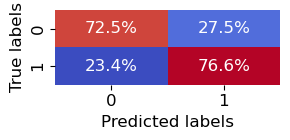

In [154]:
plt.figure(figsize=(3, 1.5))
sns.heatmap(conf_matrix_percentage, annot=True, fmt='.1%', cmap='coolwarm', cbar=False, annot_kws={'size': 12})
plt.xlabel('Predicted labels', fontsize=12)
plt.ylabel('True labels', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# plt.title('Confusion Matrix')

plt.tight_layout()
plt.savefig('confusionMatrix.png', dpi=500)
plt.show()

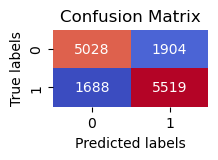

In [136]:
plt.figure(figsize=(2, 1))
sns.heatmap(conf, annot=True, fmt='g', cmap='coolwarm', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

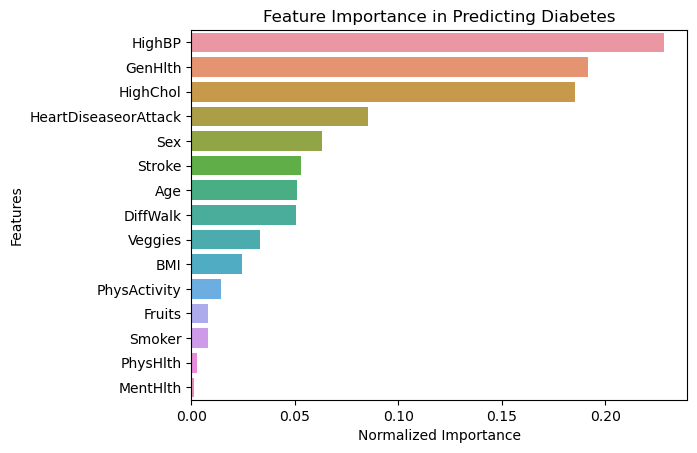

In [137]:
# Accessing coefficients
coefficients = modelLR.coef_[0]

normalized_coefficients = np.abs(coefficients) / np.sum(np.abs(coefficients))

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': normalized_coefficients
})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Diabetes')
plt.xlabel('Normalized Importance')
plt.ylabel('Features')
plt.show()

In [138]:
sorted(normalized_coefficients)

[0.0010534390428395652,
 0.002524683496213714,
 0.007965246338112162,
 0.00811417269106038,
 0.014115501106592312,
 0.02420905778090275,
 0.03294682153879222,
 0.050612051249888976,
 0.05122892694155986,
 0.05317033438163103,
 0.0633314812351807,
 0.08547382632845972,
 0.18543173272072394,
 0.19159399746039182,
 0.22822872768765118]

In [139]:
print(df['CholCheck'].value_counts(normalize=True))
print(df['HvyAlcoholConsump'].value_counts(normalize=True))

CholCheck
1.0    0.975259
0.0    0.024741
Name: proportion, dtype: float64
HvyAlcoholConsump
0.0    0.957279
1.0    0.042721
Name: proportion, dtype: float64


In [140]:
# X_train = X_train.drop(['CholCheck', 'HvyAlcoholConsump'], axis=1)
# X_test = X_test.drop(['CholCheck', 'HvyAlcoholConsump'], axis=1)

In [141]:
X_train = X_train.drop(['MentHlth', 'Smoker', 'PhysHlth', 'Fruits', 'PhysActivity', 'BMI', 'Veggies', 'DiffWalk', 'Age', 'Stroke', 'Sex'], axis = 1)
X_test = X_test.drop(['MentHlth', 'Smoker', 'PhysHlth', 'Fruits', 'PhysActivity', 'BMI', 'Veggies', 'DiffWalk', 'Age', 'Stroke', 'Sex'], axis = 1)

In [142]:
modelLR = LogisticRegression(max_iter=1000)
modelLR.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [143]:
predLR = modelLR.predict(X_test)

In [144]:
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test, predLR))
accuracy = accuracy_score(y_test, predLR)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[4771 2161]
 [1696 5511]]
              precision    recall  f1-score   support

         0.0       0.74      0.69      0.71      6932
         1.0       0.72      0.76      0.74      7207

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

Accuracy: 72.72%


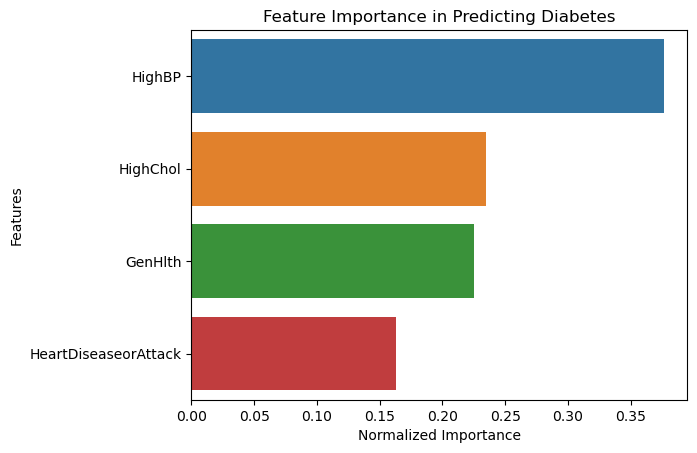

In [145]:
# Accessing coefficients
coefficients = modelLR.coef_[0]

normalized_coefficients = np.abs(coefficients) / np.sum(np.abs(coefficients))

feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': normalized_coefficients
})
feature_importance.sort_values(by='Importance', ascending=False, inplace=True)

sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance in Predicting Diabetes')
plt.xlabel('Normalized Importance')
plt.ylabel('Features')
plt.show()

In [146]:
feature_importance

,Feature,Importance
3,HighBP,0.376376
0,HighChol,0.235116
2,GenHlth,0.225415
1,HeartDiseaseorAttack,0.163093


In [147]:
y_pred_prob = modelLR.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

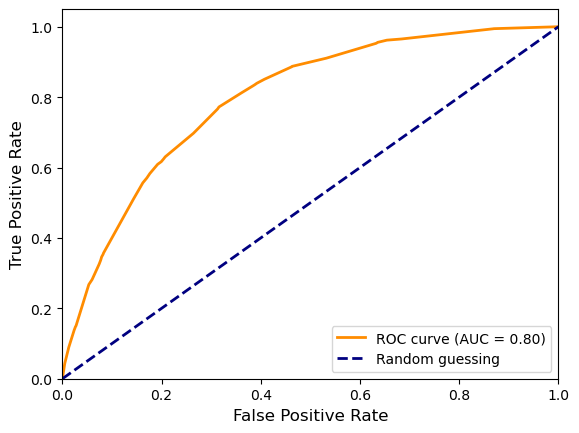

In [148]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random guessing')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
# plt.title('ROC Curve')

# optimal_idx = np.argmax(tpr - fpr)
# optimal_threshold = thresholds[optimal_idx]
# plt.scatter(fpr[optimal_idx], tpr[optimal_idx], marker='o', color='red', label='Best Threshold = %0.2f' % optimal_threshold)
plt.legend(loc="lower right")


plt.savefig('ROC.png', dpi=500)
plt.show()


Do cross validation as well. Look into the kappa statistic. Try with scaled data. 

# Naive Bayes

In [70]:
modelNB = GaussianNB()

In [71]:
modelNB.fit(X_train, y_train)

GaussianNB()

In [73]:
predNB = modelNB.predict(X_test)

In [77]:
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test, predNB))
accuracy = accuracy_score(y_test, predNB)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[5043 1889]
 [1998 5209]]
              precision    recall  f1-score   support

         0.0       0.72      0.73      0.72      6932
         1.0       0.73      0.72      0.73      7207

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

Accuracy: 72.51%


# K-Nearest Neighbours

In [79]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [115]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=11)

In [116]:
predKNN = knn.predict(X_test_scaled)

In [117]:
print(confusion_matrix(y_test, predKNN))
print(classification_report(y_test, predKNN))
accuracy = accuracy_score(y_test, predKNN)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[4729 2203]
 [1619 5588]]
              precision    recall  f1-score   support

         0.0       0.74      0.68      0.71      6932
         1.0       0.72      0.78      0.75      7207

    accuracy                           0.73     14139
   macro avg       0.73      0.73      0.73     14139
weighted avg       0.73      0.73      0.73     14139

Accuracy: 72.97%


# Decision Tree

In [119]:
decision_tree = DecisionTreeClassifier(random_state=0)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [120]:
predDT = decision_tree.predict(X_test)

In [121]:
print(confusion_matrix(y_test, predDT))
print(classification_report(y_test, predDT))
accuracy = accuracy_score(y_test, predDT)
print(f"Accuracy: {accuracy * 100:.2f}%")

[[4678 2254]
 [2586 4621]]
              precision    recall  f1-score   support

         0.0       0.64      0.67      0.66      6932
         1.0       0.67      0.64      0.66      7207

    accuracy                           0.66     14139
   macro avg       0.66      0.66      0.66     14139
weighted avg       0.66      0.66      0.66     14139

Accuracy: 65.77%


# Random Forest

In [269]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [270]:
rf_model = RandomForestClassifier(random_state=0)

In [272]:
grid_search = GridSearchCV(estimator = rf_model, param_grid = param_grid, 
                           cv = 3, n_jobs = -1, verbose = 2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_


# rf_model.fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.8s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  11.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=300; total time=  10.5s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=100; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, min_

/Users/mohammed/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   3.5s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=200; total time=   7.9s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   8.2s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.0s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  10.4s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total

[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.4s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  11.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=200; total time=   6.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   3.7s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=2, n_estimators=200; total time=   7.9s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=   7.1s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.5s
[CV] END max_depth=10, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  10.3s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=   3.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total 

[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   5.0s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  15.4s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=2, n_estimators=300; total time=  16.1s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   5.2s
[CV] END max_depth=20, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  15.4s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=2, n_estimators=300; total time=  15.0s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   5.1s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=  14.5s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   6.3s
[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=5, n_estimators=200; tot

In [275]:
best_params = grid_search.best_params_
optimized_rf = RandomForestClassifier(**best_params)
optimized_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=2, n_estimators=300)

In [277]:
rf_predictions = optimized_rf.predict(X_test)
rf_accuracy = optimized_rf.score(X_test, y_test)
print(f"Accuracy: {rf_accuracy * 100:.2f}%")
print(classification_report(y_test, rf_predictions))
print(confusion_matrix(y_test, rf_predictions))

Accuracy: 74.95%
              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6932
         1.0       0.74      0.79      0.76      7207

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[4887 2045]
 [1497 5710]]


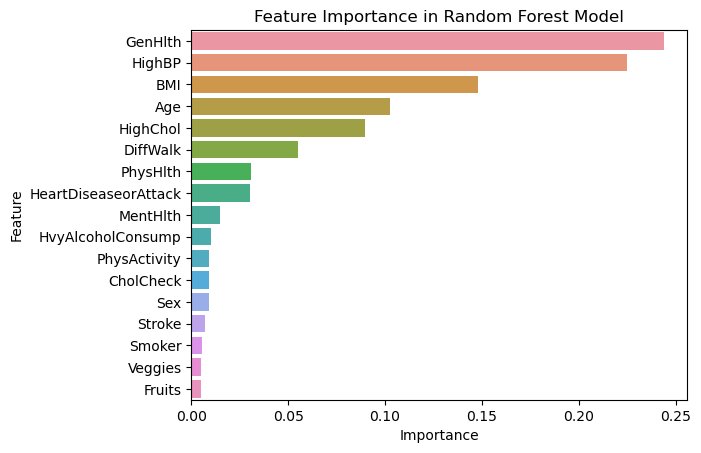

In [280]:
feature_importances = optimized_rf.feature_importances_

# Create a DataFrame for visualization
features = X_train.columns  # Adjust X_train to your features dataset
importances_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})

# Sort the DataFrame by importance
importances_df = importances_df.sort_values(by='Importance', ascending=False)

# Plotting
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# SVM

In [281]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [282]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=0)

In [284]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

In [285]:
predSVM = svm_model.predict(X_test)

In [287]:
SVMaccuracy = svm_model.score(X_test, y_test)
print(classification_report(y_test, predSVM))
print(confusion_matrix(y_test, predSVM))
print(f"Accuracy: {SVMaccuracy * 100:.2f}%")

              precision    recall  f1-score   support

         0.0       0.77      0.70      0.73      6932
         1.0       0.74      0.80      0.76      7207

    accuracy                           0.75     14139
   macro avg       0.75      0.75      0.75     14139
weighted avg       0.75      0.75      0.75     14139

[[4876 2056]
 [1476 5731]]
Accuracy: 75.02%


In [289]:
coefs = svm_model.coef_[0]

# Pair them with feature names and sort
feature_importances = sorted(zip(coefs, X.columns), reverse=True)

# Display the feature importances
for coef, feature in feature_importances:
    print(f"{feature}: {coef}")

GenHlth: 0.5524355225649213
BMI: 0.43576266863849933
HighBP: 0.36987700990538275
Age: 0.35387424344270135
HighChol: 0.2402727716295998
CholCheck: 0.15581067878921795
HeartDiseaseorAttack: 0.08268609047937459
Sex: 0.07499844045280968
DiffWalk: 0.053560642217428844
Stroke: 0.029955632044561753
Smoker: 0.010023946075364387
Fruits: -0.008528865558401266
PhysActivity: -0.020693556286768056
MentHlth: -0.021583558047055085
Veggies: -0.036639819244638105
PhysHlth: -0.08445725026421957
HvyAlcoholConsump: -0.13537199503074943


In [290]:
svm_model2 = SVC(kernel='rbf')
svm_model2.fit(X_train, y_train)

SVC()

In [291]:
predSVM2 = svm_model2.predict(X_test)

In [292]:
SVMaccuracy2 = svm_model2.score(X_test, y_test)
print(classification_report(y_test, predSVM2))
print(confusion_matrix(y_test, predSVM2))
print(f"Accuracy: {SVMaccuracy2 * 100:.2f}%")

              precision    recall  f1-score   support

         0.0       0.78      0.69      0.73      6932
         1.0       0.73      0.81      0.77      7207

    accuracy                           0.75     14139
   macro avg       0.76      0.75      0.75     14139
weighted avg       0.76      0.75      0.75     14139

[[4807 2125]
 [1358 5849]]
Accuracy: 75.37%
